In [2]:
from fastai.vision.all import *
from fastai.vision.widgets import *

In [3]:
path = untar_data(URLs.PETS)/'images'

def is_cat(x):
    return "cat" if x[0].isupper() else "dog"

dls = ImageDataLoaders.from_name_func(
    path, get_image_files(path), valid_pct=0.2, seed=42,
    label_func=is_cat, item_tfms=Resize(224))

learn = cnn_learner(dls, resnet34, metrics=error_rate)

In [4]:
learn.fine_tune(1)

(#7390) [Path('/scratch/cs344/data/oxford-iiit-pet/images/beagle_18.jpg'),Path('/scratch/cs344/data/oxford-iiit-pet/images/staffordshire_bull_terrier_92.jpg'),Path('/scratch/cs344/data/oxford-iiit-pet/images/chihuahua_191.jpg'),Path('/scratch/cs344/data/oxford-iiit-pet/images/scottish_terrier_116.jpg'),Path('/scratch/cs344/data/oxford-iiit-pet/images/British_Shorthair_39.jpg'),Path('/scratch/cs344/data/oxford-iiit-pet/images/scottish_terrier_87.jpg'),Path('/scratch/cs344/data/oxford-iiit-pet/images/Sphynx_137.jpg'),Path('/scratch/cs344/data/oxford-iiit-pet/images/english_cocker_spaniel_98.jpg'),Path('/scratch/cs344/data/oxford-iiit-pet/images/Persian_38.jpg'),Path('/scratch/cs344/data/oxford-iiit-pet/images/staffordshire_bull_terrier_76.jpg')...]

## Lab 1 Extension

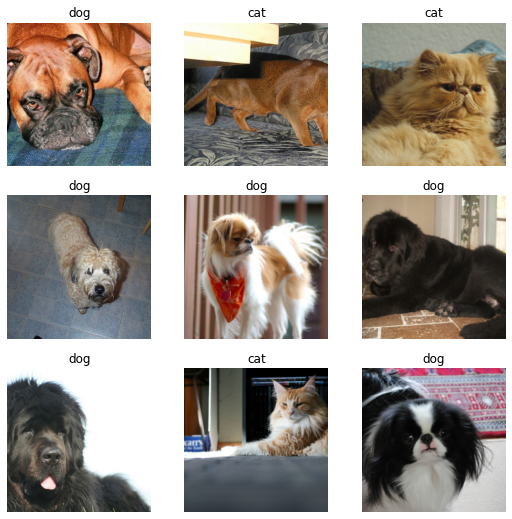

In [4]:
# Display batch from training set
dls.train.show_batch()

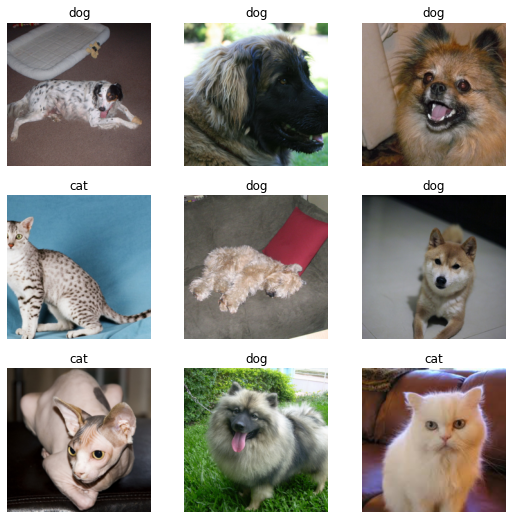

In [5]:
# Display batch from validation set
dls.valid.show_batch()

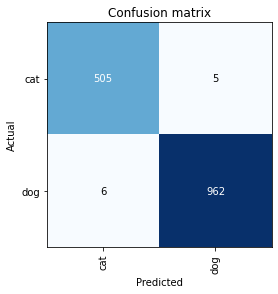

In [6]:
# Plot confusion matrix
interp = ClassificationInterpretation.from_learner(learn)
interp.plot_confusion_matrix()

1 dog was classified as a cat, and 10 cats were classified as dogs.

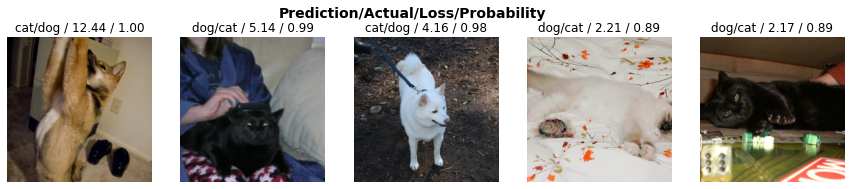

In [7]:
# Plot the images classifier was most unsure about
interp.plot_top_losses(5, nrows=1)

In [5]:
cleaner = ImageClassifierCleaner(learn)

RuntimeError: [enforce fail at CPUAllocator.cpp:65] . DefaultCPUAllocator: can't allocate memory: you tried to allocate 7119372288 bytes. Error code 12 (Cannot allocate memory)